In [1]:
using DrWatson
@quickactivate "Doran_etal_2022"

using MLJ, SPI
using Distances
using StatsPlots, StatsBase
using Muon, CSV, DataFrames

In [2]:
rdir = datadir("exp_pro", "BB728") |> mkpath
pdir = plotsdir("CSB_predictivemodels") |> mkpath
biobank = readh5mu(joinpath(rdir, "BB728.h5mu"))

┌ Warning: Cannot join columns with the same name because var_names are intersecting.
└ @ Muon /Users/ben/.julia/packages/Muon/eLqpV/src/mudata.jl:351


MuData object 728 ✕ 21485
└ metabolites_foldchange
  AnnData object 728 ✕ 50
└ metabolites_millimolar
  AnnData object 728 ✕ 10
└ UPorder_oggs
  AnnData object 728 ✕ 10177
└ oggs
  AnnData object 728 ✕ 11248

In [3]:
biobank[:UPorder_oggs].obsp |> keys

KeySet for a Muon.AlignedMapping{Tuple{1 => 1, 2 => 1}, String, AnnData} with 4 entries. Keys:
  "SDij"
  "SDij_earlywindow"
  "SDij_middlewindow"
  "SDij_latewindow"

In [4]:
Dij_ew = biobank[:UPorder_oggs].obsp["SDij_earlywindow"][:,:]
Dij_mw = biobank[:UPorder_oggs].obsp["SDij_middlewindow"][:,:]
Dij_lw = biobank[:UPorder_oggs].obsp["SDij_latewindow"][:,:];

In [5]:
inBB673 = biobank.obs.inBB673 .== 1;

In [6]:
train_uppertri = triu(trues(sum(inBB673), sum(inBB673)), 1)
test_uppertri = triu(trues(sum(.!inBB673), sum(.!inBB673)), 1);

In [7]:
biobank

MuData object 728 ✕ 21485
└ metabolites_foldchange
  AnnData object 728 ✕ 50
└ metabolites_millimolar
  AnnData object 728 ✕ 10
└ UPorder_oggs
  AnnData object 728 ✕ 10177
└ oggs
  AnnData object 728 ✕ 11248

In [8]:
bbmM = biobank["metabolites_millimolar"].X[:, 1:4];

In [9]:
traindf = DataFrame(
    :earlywindowdist => Dij_ew[inBB673, inBB673][train_uppertri],
    :middlewindowdist => Dij_mw[inBB673, inBB673][train_uppertri],
    :latewindowdist => Dij_lw[inBB673, inBB673][train_uppertri],
    :samephylum => (biobank.obs.phylum .== permutedims(biobank.obs.phylum))[inBB673, inBB673][train_uppertri],
    :samefamily => (biobank.obs.family .== permutedims(biobank.obs.family))[inBB673, inBB673][train_uppertri],
    :samespecies=> (biobank.obs.species .== permutedims(biobank.obs.species))[inBB673, inBB673][train_uppertri],
    :samedonor => (biobank.obs.donor .== permutedims(biobank.obs.donor))[inBB673, inBB673][train_uppertri],
    :metdist => Distances.pairwise(Euclidean(), bbmM')[inBB673, inBB673][train_uppertri],
);

In [83]:
@df traindf scatter(
        :earlywindowdist / maximum(:earlywindowdist), 
        :middlewindowdist / maximum(:middlewindowdist), 
        :latewindowdist / maximum(:latewindowdist), 
        group=:samephylum,
        camera=(45, 10),
        size=(500,500),
        framestyle=:origin,
        ymirror=true,
        ticks=[0,1],
        # xlabel="early window",
        # ylabel="middle window",
        # zlabel="late window",
        margin=-3Plots.Measures.mm,
        legendtitle="same phylum",
        grid=false,
        legend=:none,
        alpha=.1, markersize=.5, markerstrokewidth=0,
        format=:png, dpi=400,
    );
savefig(joinpath(pdir, "scatter_earlymiddlelate_SPIdist-samephylum.png"))

In [84]:
@df traindf scatter(
        :earlywindowdist / maximum(:earlywindowdist), 
        :middlewindowdist / maximum(:middlewindowdist), 
        :latewindowdist / maximum(:latewindowdist), 
        group=:samespecies,
        camera=(45, 10),
        size=(500,500),
        framestyle=:origin,
        ymirror=true,
        ticks=[0,1],
        # xlabel="early window",
        # ylabel="middle window",
        # zlabel="late window",
        margin=-3Plots.Measures.mm,
        legendtitle="same phylum",
        grid=false,
        legend=:none,
        alpha=.1, markersize=.5, markerstrokewidth=0,
        format=:png, dpi=400,
    );
savefig(joinpath(pdir, "scatter_earlymiddlelate_SPIdist-samespecies.png"))

"/Users/ben/projects/Doran_etal_2022/plots/CSB_predictivemodels/scatter_earlymiddlelate_SPIdist-samespecies.png"

In [85]:
@df traindf scatter(
        :earlywindowdist / maximum(:earlywindowdist), 
        :middlewindowdist / maximum(:middlewindowdist), 
        :latewindowdist / maximum(:latewindowdist), 
        group=:samedonor,
        camera=(45, 10),
        size=(500,500),
        framestyle=:origin,
        ymirror=true,
        ticks=[0,1],
        # xlabel="early window",
        # ylabel="middle window",
        # zlabel="late window",
        margin=-3Plots.Measures.mm,
        legendtitle="same phylum",
        grid=false,
        legend=:none,
        alpha=.1, markersize=.5, markerstrokewidth=0,
        format=:png, dpi=400,
    );
savefig(joinpath(pdir, "scatter_earlymiddlelate_SPIdist-samedonor.png"))

"/Users/ben/projects/Doran_etal_2022/plots/CSB_predictivemodels/scatter_earlymiddlelate_SPIdist-samedonor.png"

In [10]:
p1 = @df traindf scatter(:earlywindowdist, :middlewindowdist,
    group = :samephylum,
    title="spectral distance",
    xlabel="early window",
    ylabel="middle window",
    # zlabel="late window",
    legendtitle="same phylum",
    alpha=.1, markersize=.7, markerstrokewidth=0,
    legend=:none,
    grid=false,
)

p2 = @df traindf scatter(:earlywindowdist, :latewindowdist,
    group = :samephylum,
    title="spectral distance",
    xlabel="early window",
    ylabel="late window",
    # zlabel="late window",
    legendtitle="same phylum",
    alpha=.05, markersize=.5, markerstrokewidth=0,
    legend=:none,
    grid=false,
)

p3 = @df traindf scatter(:middlewindowdist, :latewindowdist,
    group = :samephylum,
    title="spectral distance",
    xlabel="middle window",
    ylabel="late window",
    # zlabel="late window",
    legendtitle="same phylum",
    alpha=.05, markersize=.5, markerstrokewidth=0,
    legend=:outertopright,
    grid=false,
)

lyt = @layout [a b c{.5w}]
plot(p1, p2, p3, layout=lyt, size=(1200, 600), margin=Plots.Measures.cm, format=:png, dpi=150)
savefig(joinpath(pdir, "samephylum_windowedSPIdist.png"))

"/Users/ben/projects/Doran_etal_2022/plots/CSB_predictivemodels/samephylum_windowedSPIdist.png"

In [11]:
p1 = @df traindf scatter(:earlywindowdist, :middlewindowdist,
    group = :samespecies,
    title="spectral distance",
    xlabel="early window",
    ylabel="middle window",
    # zlabel="late window",
    legendtitle="same species",
    alpha=.1, markersize=.7, markerstrokewidth=0,
    legend=:none,
    format=:png, dpi=150,
    grid=false,
)

p2 = @df traindf scatter(:earlywindowdist, :latewindowdist,
    group = :samespecies,
    title="spectral distance",
    xlabel="early window",
    ylabel="late window",
    # zlabel="late window",
    legendtitle="same species",
    alpha=.05, markersize=.5, markerstrokewidth=0,
    legend=:none,
    format=:png, dpi=150,
    grid=false,
)

p3 = @df traindf scatter(:middlewindowdist, :latewindowdist,
    group = :samespecies,
    title="spectral distance",
    xlabel="middle window",
    ylabel="late window",
    # zlabel="late window",
    legendtitle="same species",
    alpha=.05, markersize=.5, markerstrokewidth=0,
    legend=:outertopright,
    format=:png, dpi=150,
    grid=false,
)

lyt = @layout [a b c{.4w}]
plot(p1, p2, p3, layout=lyt, size=(1200, 600), margin=Plots.Measures.cm)
savefig(joinpath(pdir, "samespecies_windowedSPIdist.png"))

"/Users/ben/projects/Doran_etal_2022/plots/CSB_predictivemodels/samespecies_windowedSPIdist.png"

In [12]:
p1 = @df traindf scatter(:earlywindowdist, :middlewindowdist,
    group = :samedonor,
    title="spectral distance",
    xlabel="early window",
    ylabel="middle window",
    # zlabel="late window",
    legendtitle="same donor",
    alpha=.1, markersize=.7, markerstrokewidth=0,
    legend=:none,
    format=:png, dpi=150,
    grid=false,
)

p2 = @df traindf scatter(:earlywindowdist, :latewindowdist,
    group = :samedonor,
    title="spectral distance",
    xlabel="early window",
    ylabel="late window",
    # zlabel="late window",
    legendtitle="same donor",
    alpha=.05, markersize=.5, markerstrokewidth=0,
    legend=:none,
    format=:png, dpi=150,
    grid=false,
)

p3 = @df traindf scatter(:middlewindowdist, :latewindowdist,
    group = :samedonor,
    title="spectral distance",
    xlabel="middle window",
    ylabel="late window",
    # zlabel="late window",
    legendtitle="same donor",
    alpha=.05, markersize=.5, markerstrokewidth=0,
    legend=:outertopright,
    format=:png, dpi=150,
    grid=false,
)

lyt = @layout [a b c{.4w}]
plot(p1, p2, p3, layout=lyt, size=(1200, 600), margin=Plots.Measures.cm)
savefig(joinpath(pdir, "samedonor_windowedSPIdist.png"))

"/Users/ben/projects/Doran_etal_2022/plots/CSB_predictivemodels/samedonor_windowedSPIdist.png"

In [13]:
p1 = @df traindf scatter(:earlywindowdist, :middlewindowdist,
    marker_z=:metdist,
    title="spectral distance",
    xlabel="early window",
    ylabel="middle window",
    # zlabel="late window",
    # legendtitle="metabolites (mM)",
    alpha=.2, markersize=.7, markerstrokewidth=0,
    legend=:none,
    format=:png, dpi=150,
    grid=false,
    c=:devon,
)

p2 = @df traindf scatter(:earlywindowdist, :latewindowdist,
    marker_z=:metdist,
    title="spectral distance",
    xlabel="early window",
    ylabel="late window",
    # zlabel="late window",
    # legendtitle="metabolites (mM)",
    alpha=.2, markersize=.7, markerstrokewidth=0,
    legend=:none,
    format=:png, dpi=150,
    grid=false,
    c=:devon,
)

p3 = @df traindf scatter(:middlewindowdist, :latewindowdist,
    marker_z=:metdist,
    title="spectral distance",
    xlabel="middle window",
    ylabel="late window",
    label="",
    # zlabel="late window",
    colorbartitle="metabolite distance",
    alpha=1, markersize=.7, markerstrokewidth=0,
    legend=:none,
    colorbar=true,
    format=:png, dpi=150,
    grid=false,
    c=:devon,
)

lyt = @layout [a{.3w} b{.3w} c]
plot(p1, p2, p3, layout=lyt, size=(1200, 600), margin=5Plots.Measures.mm)
savefig(joinpath(pdir, "metabolitedistance_windowedSPIdist.png"))

"/Users/ben/projects/Doran_etal_2022/plots/CSB_predictivemodels/metabolitedistance_windowedSPIdist.png"

In [14]:
p1 = @df traindf scatter(:earlywindowdist, :middlewindowdist,
    group=:metdist .< 2.,
    title="spectral distance",
    xlabel="early window",
    ylabel="middle window",
    # zlabel="late window",
    # legendtitle="metabolites (mM)",
    alpha=.2, markersize=.7, markerstrokewidth=0,
    legend=:none,
    format=:png, dpi=150,
    grid=false,
    # c=:devon,
)

p2 = @df traindf scatter(:earlywindowdist, :latewindowdist,
    group=:metdist .< 2.,
    title="spectral distance",
    xlabel="early window",
    ylabel="late window",
    # zlabel="late window",
    # legendtitle="metabolites (mM)",
    alpha=.2, markersize=.5, markerstrokewidth=0,
    legend=:none,
    format=:png, dpi=150,
    grid=false,
    # c=:devon,
)

p3 = @df traindf scatter(:middlewindowdist, :latewindowdist,
    group=:metdist .< 2.,
    title="spectral distance",
    xlabel="middle window",
    ylabel="late window",
    label="",
    # zlabel="late window",
    colorbartitle="metabolite distance",
    alpha=1, markersize=.7, markerstrokewidth=0,
    legend=:none,
    colorbar=true,
    format=:png, dpi=150,
    grid=false,
    # c=:devon,
)

lyt = @layout [a{.3w} b{.3w} c]
plot(p1, p2, p3, layout=lyt, size=(1200, 600), margin=5Plots.Measures.mm)
savefig(joinpath(pdir, "metabolitedistance_grouped_windowedSPIdist.png"))

"/Users/ben/projects/Doran_etal_2022/plots/CSB_predictivemodels/metabolitedistance_grouped_windowedSPIdist.png"

In [15]:
@load LogisticClassifier pkg=MLJLinearModels
@load MultinomialClassifier pkg=MLJLinearModels

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/ben/.julia/packages/MLJModels/8Nrhi/src/loading.jl:159


import MLJLinearModels ✔


import MLJLinearModels ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/ben/.julia/packages/MLJModels/8Nrhi/src/loading.jl:159


MLJLinearModels.MultinomialClassifier

In [16]:
mdl = MLJLinearModels.MultinomialClassifier(penalty=:none)

MultinomialClassifier(
  lambda = 2.220446049250313e-16, 
  gamma = 0.0, 
  penalty = :none, 
  fit_intercept = true, 
  penalize_intercept = false, 
  scale_penalty_with_samples = true, 
  solver = nothing)

In [196]:
y = hcat(traindf[:, :samephylum], traindf[:, :samespecies], traindf[:, :samedonor]) |>
    x->mapslices(x->join(Int.(x)), x, dims=2) |>
    vec;
y = coerce(y, OrderedFactor);

In [200]:
values(countmap(y)) ./ length(y)

6-element Vector{Float64}:
 0.5063908058322816
 0.00899993734504086
 0.029779007008404714
 0.026937157075982564
 0.03143488807139085
 0.3964582046668994

In [201]:
schema(traindf)

┌──────────────────┬────────────┬─────────┐
│ names            │ scitypes   │ types   │
├──────────────────┼────────────┼─────────┤
│ earlywindowdist  │ Continuous │ Float64 │
│ middlewindowdist │ Continuous │ Float64 │
│ latewindowdist   │ Continuous │ Float64 │
│ samephylum       │ Count      │ Bool    │
│ samefamily       │ Count      │ Bool    │
│ samespecies      │ Count      │ Bool    │
│ samedonor        │ Count      │ Bool    │
│ metdist          │ Continuous │ Float64 │
└──────────────────┴────────────┴─────────┘


In [202]:
Xargs = [:earlywindowdist, :middlewindowdist, :latewindowdist]
X = traindf[:, Xargs]
mach = machine(mdl, X, y)

untrained Machine; caches model-specific representations of data
  model: MultinomialClassifier(lambda = 2.220446049250313e-16, …)
  args: 
    1:	Source @046 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @721 ⏎ AbstractVector{OrderedFactor{6}}


In [212]:
aggregation(confusion_matrix)

StatisticalTraits.Sum()

In [226]:
aggregation(confusion_matrix)

StatisticalTraits.Sum()

In [229]:
import MLJBase

In [245]:
cv = StratifiedCV(nfolds=5)
msrs = [multiclass_f1score, multiclass_precision, multiclass_recall, confusion_matrix]
# results = evaluate!(mach, resampling=cv, measure=msrs, verbosity=0)
mach_small = machine(mdl, X, y)
results = evaluate!(mach_small, resampling=cv, measure=msrs, verbosity=0);

In [249]:
# cm = confusion_matrix(y, ŷ);
cm = results.measurement[4].mat'

6×6 adjoint(::Matrix{Int64}) with eltype Int64:
 106749  0   6399  3     0     0
   6496  0    158  0     0     0
   4818  0  82193  4  1564     8
    513  0   5389  0    84    33
     32  0   1181  0  5636   175
      9  0     32  0   269  1701

In [250]:
mapslices(s->s./vec(sum(cm, dims=2)), cm, dims=1)

6×6 Matrix{Float64}:
 0.943421    0.0  0.0565527  2.65132e-5  0.0        0.0
 0.976255    0.0  0.0237451  0.0         0.0        0.0
 0.0543872   0.0  0.927822   4.51534e-5  0.017655   9.03067e-5
 0.0852301   0.0  0.895331   0.0         0.0139558  0.00548264
 0.00455581  0.0  0.168138   0.0         0.802392   0.0249146
 0.00447539  0.0  0.0159125  0.0         0.133764   0.845848

In [251]:
countmap(y)

Dict{CategoricalArrays.CategoricalValue{String, UInt32}, Int64} with 6 entries:
  "000" => 113151
  "111" => 2011
  "001" => 6654
  "101" => 6019
  "110" => 7024
  "100" => 88587

In [252]:
countmap(ŷ)

Dict{CategoricalArrays.CategoricalValue{String, UInt32}, Int64} with 5 entries:
  "000" => 118632
  "111" => 1914
  "101" => 8
  "110" => 7516
  "100" => 95376

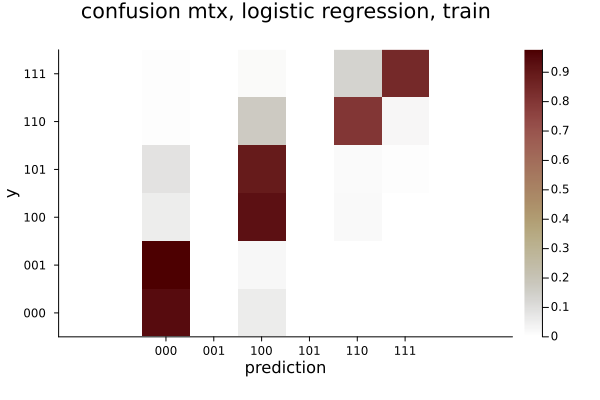

In [272]:
heatmap(mapslices(s->s./vec(sum(cm, dims=2)), cm, dims=1),
    title="confusion mtx, logistic regression, train",
    ylabel="y", xlabel="prediction",
    rightmargin = 5Plots.Measures.mm,
    tick_dir=:out,
    ratio=1, grid=false,
    xticks = (1:6, ["000", "001", "100", "101", "110", "111"]), 
    yticks = (1:6, ["000", "001", "100", "101", "110", "111"]),
    c=:bilbao)

In [275]:
savefig(joinpath(pdir, "TrainingData_out-of-fold-predictions_confusionplot.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/CSB_predictivemodels/TrainingData_out-of-fold-predictions_confusionplot.pdf"

In [254]:
sum(.!inBB673)

59

In [255]:
cm |> typeof |> fieldnames

(:parent,)

In [256]:
testdf = DataFrame(
    :earlywindowdist => Dij_ew[.!inBB673, .!inBB673][test_uppertri],
    :middlewindowdist => Dij_mw[.!inBB673, .!inBB673][test_uppertri],
    :latewindowdist => Dij_lw[.!inBB673, .!inBB673][test_uppertri],
    :samephylum => (biobank.obs.phylum .== permutedims(biobank.obs.phylum))[.!inBB673, .!inBB673][test_uppertri],
    :samefamily => (biobank.obs.family .== permutedims(biobank.obs.family))[.!inBB673, .!inBB673][test_uppertri],
    :samespecies=> (biobank.obs.species .== permutedims(biobank.obs.species))[.!inBB673, .!inBB673][test_uppertri],
    :samedonor => (biobank.obs.donor .== permutedims(biobank.obs.donor))[.!inBB673, .!inBB673][test_uppertri],
);

In [257]:
testdf

Row,earlywindowdist,middlewindowdist,latewindowdist,samephylum,samefamily,samespecies,samedonor
,Float64,Float64,Float64,Bool,Bool,Bool,Bool
1,9.6151e-10,6.71868e-7,0.000471012,true,true,true,true
2,5.54707e-5,0.0107538,1.45193,true,false,false,false
3,5.53226e-5,0.010763,1.44785,true,false,false,false
4,5.44094e-8,6.97056e-6,0.000526892,true,true,true,true
5,5.67864e-8,6.43435e-6,5.87784e-5,true,true,true,true
6,5.5824e-5,0.0107665,1.44773,true,false,false,false
7,9.6151e-10,6.71868e-7,0.000471012,true,true,true,true
8,0.0,2.79967e-20,1.26572e-17,true,true,true,true
9,5.53226e-5,0.010763,1.44785,true,false,false,false


In [261]:
mach_small

trained Machine; caches model-specific representations of data
  model: MultinomialClassifier(lambda = 2.220446049250313e-16, …)
  args: 
    1:	Source @783 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @652 ⏎ AbstractVector{OrderedFactor{6}}


In [262]:
ytest = hcat(testdf[:, :samephylum], testdf[:, :samespecies], testdf[:, :samedonor]) |>
    x->mapslices(x->join(Int.(x)), x, dims=2) |>
    vec;
ytest = coerce(ytest, Multiclass);

In [263]:
countmap(ytest)

Dict{CategoricalArrays.CategoricalValue{String, UInt32}, Int64} with 4 entries:
  "111" => 282
  "101" => 34
  "110" => 30
  "100" => 1365

In [264]:
Xtest = testdf[:, Xargs];

In [265]:
ŷ_test = MLJ.predict_mode(mach_small, Xtest);

In [266]:
cmt = confusion_matrix(ytest, ŷ_test)

6×6 Matrix{Int64}:
 668  0  635  0  61    1
   0  0   26  0   8    0
   2  0   11  0  16    1
   3  0   20  0   0  259
   0  0    0  0   0    0
   0  0    0  0   0    0

In [267]:
sum(cmt.mat[1:4, :], dims=2)

4×1 Matrix{Int64}:
 1365
   34
   30
  282

In [1]:
nrows(tstXdf)

UndefVarError: UndefVarError: nrows not defined

In [11]:
countmap(ytest)

UndefVarError: UndefVarError: ytest not defined

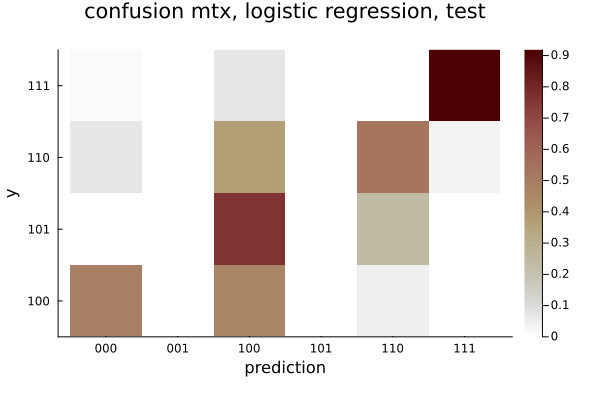

In [276]:
heatmap(mapslices(s->s./vec(sum(cmt.mat[1:4, :], dims=2)), cmt.mat[1:4, :], dims=1),
    title="confusion mtx, logistic regression, test",
    ylabel="y", xlabel="prediction",
    rightmargin = 5Plots.Measures.mm,
    ratio=1, grid=false,
    xticks = (1:6, ["000", "001", "100", "101", "110", "111"]), 
    yticks = (1:4, ["100", "101", "110", "111"]),
    c=:bilbao)

In [277]:
savefig(joinpath(pdir, "TestData_outofdataset_confusionplot.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/CSB_predictivemodels/TestData_outofdataset_confusionplot.pdf"

In [270]:
fitted_params(mach_small)

(classes = CategoricalArrays.CategoricalValue{String, UInt32}["000", "001", "100", "101", "110", "111"],
 coefs = Pair{Symbol, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, Base.Slice{Base.OneTo{Int64}}}, true}}[:earlywindowdist => [1158.9046172888704, 1230.5900471735608, -1906.3636597900568, -466.3310855487404, -22.236344353698975, 5.436425230026023], :middlewindowdist => [54.033495527485265, 58.15559055744397, 9.36477516740336, -27.00124975086874, -80.212283339427, -14.340328162025243], :latewindowdist => [0.3023541571375626, -0.03546833950402006, 3.372847843016915, 3.2978389402741066, -1.3171230293428757, -5.620449571716647]],
 intercept = [0.30952017267008797, -1.9503583259406483, -3.1508799514243364, -5.562637023523347, 4.393098218333962, 5.961256910188246],)

In [271]:
mach_small

trained Machine; caches model-specific representations of data
  model: MultinomialClassifier(lambda = 2.220446049250313e-16, …)
  args: 
    1:	Source @783 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @652 ⏎ AbstractVector{OrderedFactor{6}}


## Simple model

In [17]:
mdl = MLJLinearModels.LogisticClassifier(penalty=:none)

LogisticClassifier(
  lambda = 2.220446049250313e-16, 
  gamma = 0.0, 
  penalty = :none, 
  fit_intercept = true, 
  penalize_intercept = false, 
  scale_penalty_with_samples = true, 
  solver = nothing)

In [33]:
y = hcat(traindf[:, :samephylum], traindf[:, :samespecies], traindf[:, :samedonor]) |>
    x->mapslices(x->join(Int.(x)), x, dims=2) |>
    x-> (x .== "111") |>
    x-> string.(x) |>
    vec |>
    x->coerce(x, OrderedFactor);

In [34]:
values(countmap(y)) ./ length(y)

2-element Vector{Float64}:
 0.00899993734504086
 0.9910000626549591

In [35]:
schema(traindf)

┌──────────────────┬────────────┬─────────┐
│ names            │ scitypes   │ types   │
├──────────────────┼────────────┼─────────┤
│ earlywindowdist  │ Continuous │ Float64 │
│ middlewindowdist │ Continuous │ Float64 │
│ latewindowdist   │ Continuous │ Float64 │
│ samephylum       │ Count      │ Bool    │
│ samefamily       │ Count      │ Bool    │
│ samespecies      │ Count      │ Bool    │
│ samedonor        │ Count      │ Bool    │
│ metdist          │ Continuous │ Float64 │
└──────────────────┴────────────┴─────────┘


In [36]:
Xargs = [:earlywindowdist, :middlewindowdist, :latewindowdist]
X = traindf[:, Xargs]
mach = machine(mdl, X, y)

untrained Machine; caches model-specific representations of data
  model: LogisticClassifier(lambda = 2.220446049250313e-16, …)
  args: 
    1:	Source @091 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @659 ⏎ AbstractVector{OrderedFactor{2}}


In [37]:
cv = StratifiedCV(nfolds=5)
msrs = [multiclass_f1score, multiclass_precision, multiclass_recall, confusion_matrix]
results = evaluate!(mach, resampling=cv, measure=msrs, verbosity=0);

In [45]:
results.measurement

4-element Vector{Any}:
 0.9324100239515962
 0.942348664554998
 0.9229293220364655
  MLJBase.ConfusionMatrixObject{2}([221216 308; 219 1703], ["false", "true"])

In [38]:
# cm = confusion_matrix(y, ŷ);
cm = results.measurement[4].mat'

2×2 adjoint(::Matrix{Int64}) with eltype Int64:
 221216   219
    308  1703

In [39]:
mapslices(s->s./vec(sum(cm, dims=2)), cm, dims=1)

2×2 Matrix{Float64}:
 0.999011  0.000989004
 0.153158  0.846842

In [40]:
countmap(y)

Dict{CategoricalArrays.CategoricalValue{String, UInt32}, Int64} with 2 entries:
  "true"  => 2011
  "false" => 221435

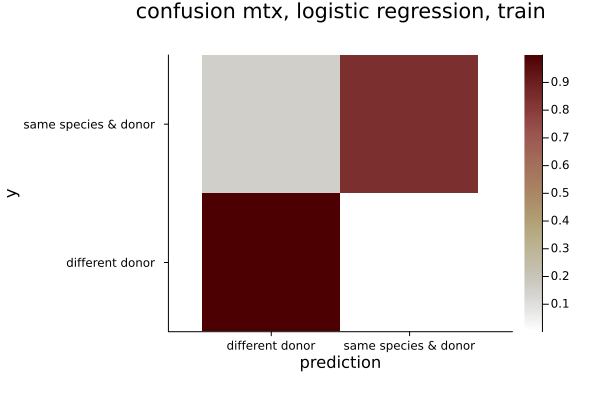

In [61]:
heatmap(mapslices(s->s./vec(sum(cm, dims=2)), cm, dims=1),
    title="confusion mtx, logistic regression, train",
    ylabel="y", xlabel="prediction",
    rightmargin = 5Plots.Measures.mm,
    tick_dir=:out,
    ratio=1, grid=false,
    xticks = (1:2, ["different donor", "same species & donor"]), 
    yticks = (1:2, ["different donor", "same species & donor"]),
    c=:bilbao)

In [62]:
savefig(joinpath(pdir, "training_confusionplot.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/CSB_predictivemodels/training_confusionplot.pdf"

In [47]:
testdf = DataFrame(
    :earlywindowdist => Dij_ew[.!inBB673, .!inBB673][test_uppertri],
    :middlewindowdist => Dij_mw[.!inBB673, .!inBB673][test_uppertri],
    :latewindowdist => Dij_lw[.!inBB673, .!inBB673][test_uppertri],
    :samephylum => (biobank.obs.phylum .== permutedims(biobank.obs.phylum))[.!inBB673, .!inBB673][test_uppertri],
    :samefamily => (biobank.obs.family .== permutedims(biobank.obs.family))[.!inBB673, .!inBB673][test_uppertri],
    :samespecies=> (biobank.obs.species .== permutedims(biobank.obs.species))[.!inBB673, .!inBB673][test_uppertri],
    :samedonor => (biobank.obs.donor .== permutedims(biobank.obs.donor))[.!inBB673, .!inBB673][test_uppertri],
);

In [48]:
ytest = hcat(testdf[:, :samephylum], testdf[:, :samespecies], testdf[:, :samedonor]) |>
    x->mapslices(x->join(Int.(x)), x, dims=2) |>
    x-> (x .== "111") |>
    x-> string.(x) |>
    vec |>
    x->coerce(x, OrderedFactor);

In [49]:
countmap(ytest)

Dict{CategoricalArrays.CategoricalValue{String, UInt32}, Int64} with 2 entries:
  "true"  => 282
  "false" => 1429

In [50]:
Xtest = testdf[:, Xargs];

In [51]:
ŷ_test = MLJ.predict_mode(mach, Xtest);

In [59]:
multiclass_f1score(ytest, ŷ_test)

0.9726379568309796

In [52]:
cmt = confusion_matrix(ytest, ŷ_test)

              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │    false    │    true     │
├─────────────┼─────────────┼─────────────┤
│    false    │    1427     │      2      │
├─────────────┼─────────────┼─────────────┤
│    true     │     23      │     259     │
└─────────────┴─────────────┴─────────────┘


In [54]:
sum(cmt.mat, dims=2)

2×1 Matrix{Int64}:
 1429
  282

In [56]:
countmap(ytest)

Dict{CategoricalArrays.CategoricalValue{String, UInt32}, Int64} with 2 entries:
  "true"  => 282
  "false" => 1429

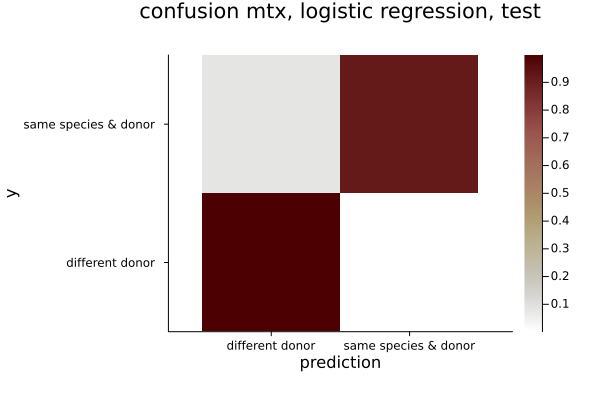

In [63]:
heatmap(mapslices(s->s./vec(sum(cmt.mat, dims=2)), cmt.mat, dims=1),
    title="confusion mtx, logistic regression, test",
    ylabel="y", xlabel="prediction",
    rightmargin = 5Plots.Measures.mm,
    tickdirection=:out,
    ratio=1, grid=false,
    xticks = (1:2, ["different donor", "same species & donor"]), 
    yticks = (1:2, ["different donor", "same species & donor"]),
    c=:bilbao)

In [64]:
savefig(joinpath(pdir, "testing_confusionplot.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/CSB_predictivemodels/testing_confusionplot.pdf"